# Process mining with pm4py

In [1]:
import deetly
import requests
import tempfile
import shutil
import pm4py
import pandas as pd

from pm4py.statistics.attributes.log import get as attributes_filter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.statistics.traces.log import case_statistics
from pm4py.visualization.graphs import visualizer as graphs_visualizer

In [2]:
# Create datastory
package = {
    "name":"Process mining with pm4py", 
    "keyword": ["example, graph, graphviz"]
}

ds = deetly.story(package)

In [3]:
url = 'https://storage.googleapis.com/vega-datasets/process-mining/receipt.xes'
with requests.get(url, stream=True) as r:
        fp = tempfile.NamedTemporaryFile()
        shutil.copyfileobj(r.raw, fp)
        
log = pm4py.read_xes(fp.name)
fp.close()

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

In [4]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

In [5]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

InvocationException: GraphViz's executables not found

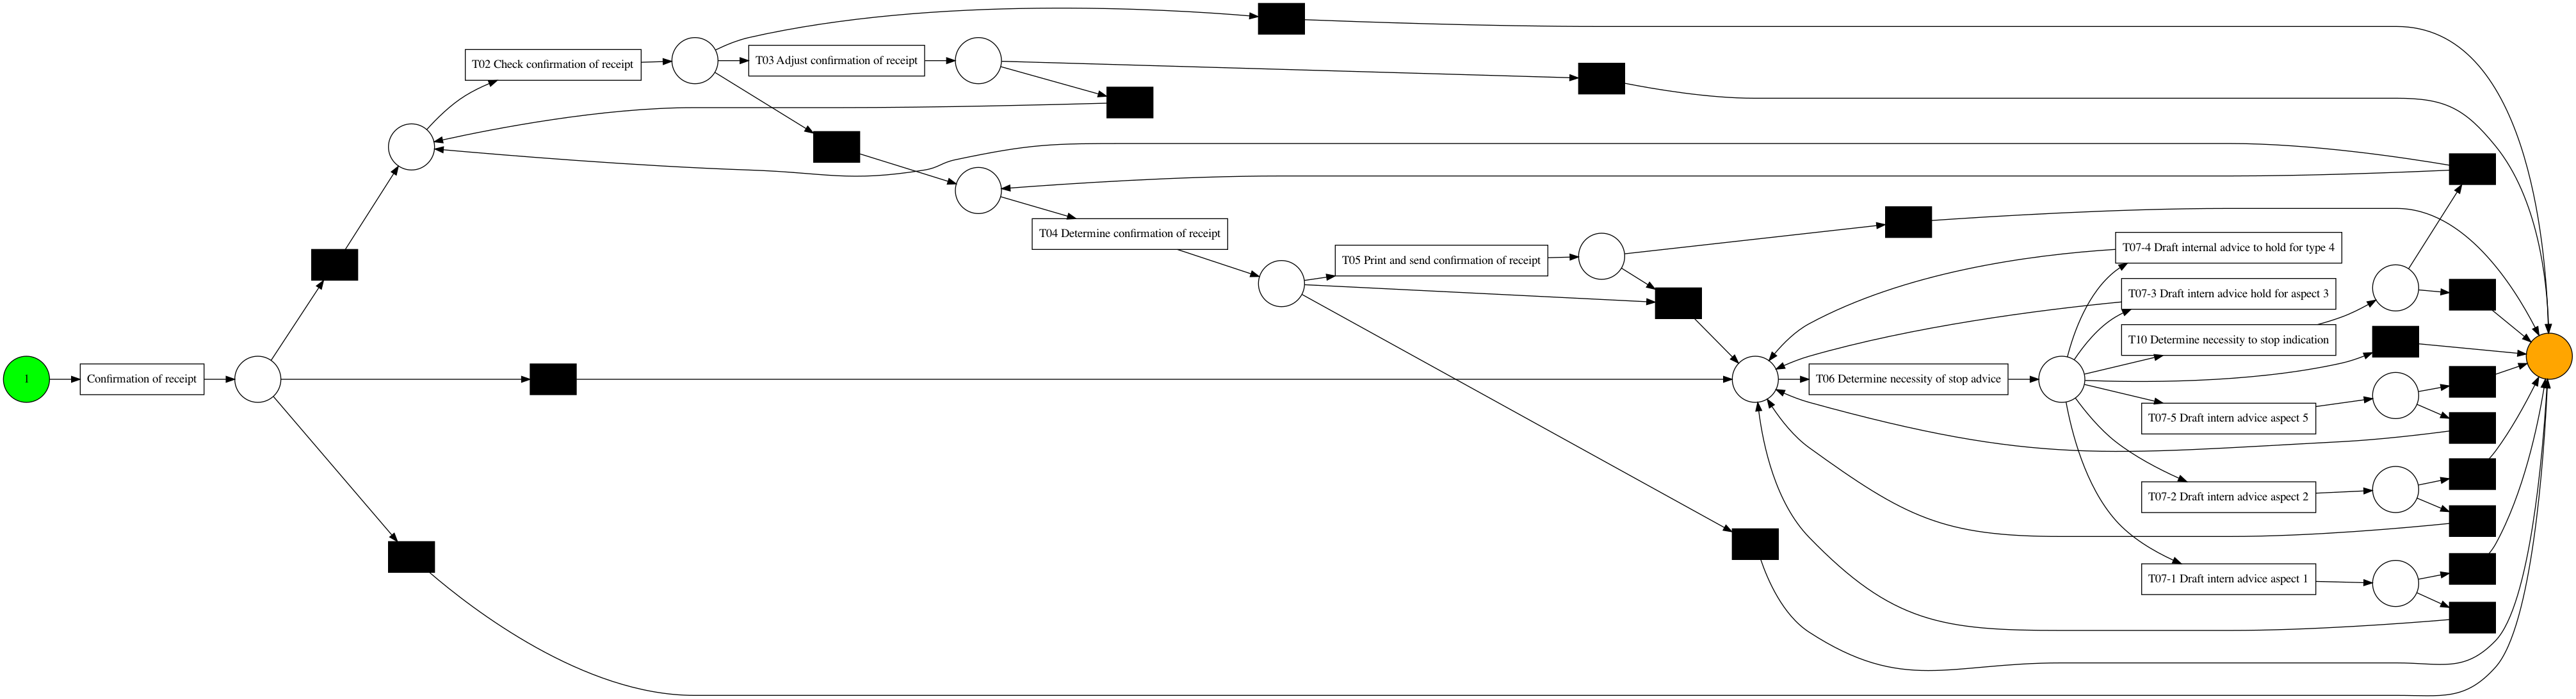

In [6]:
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

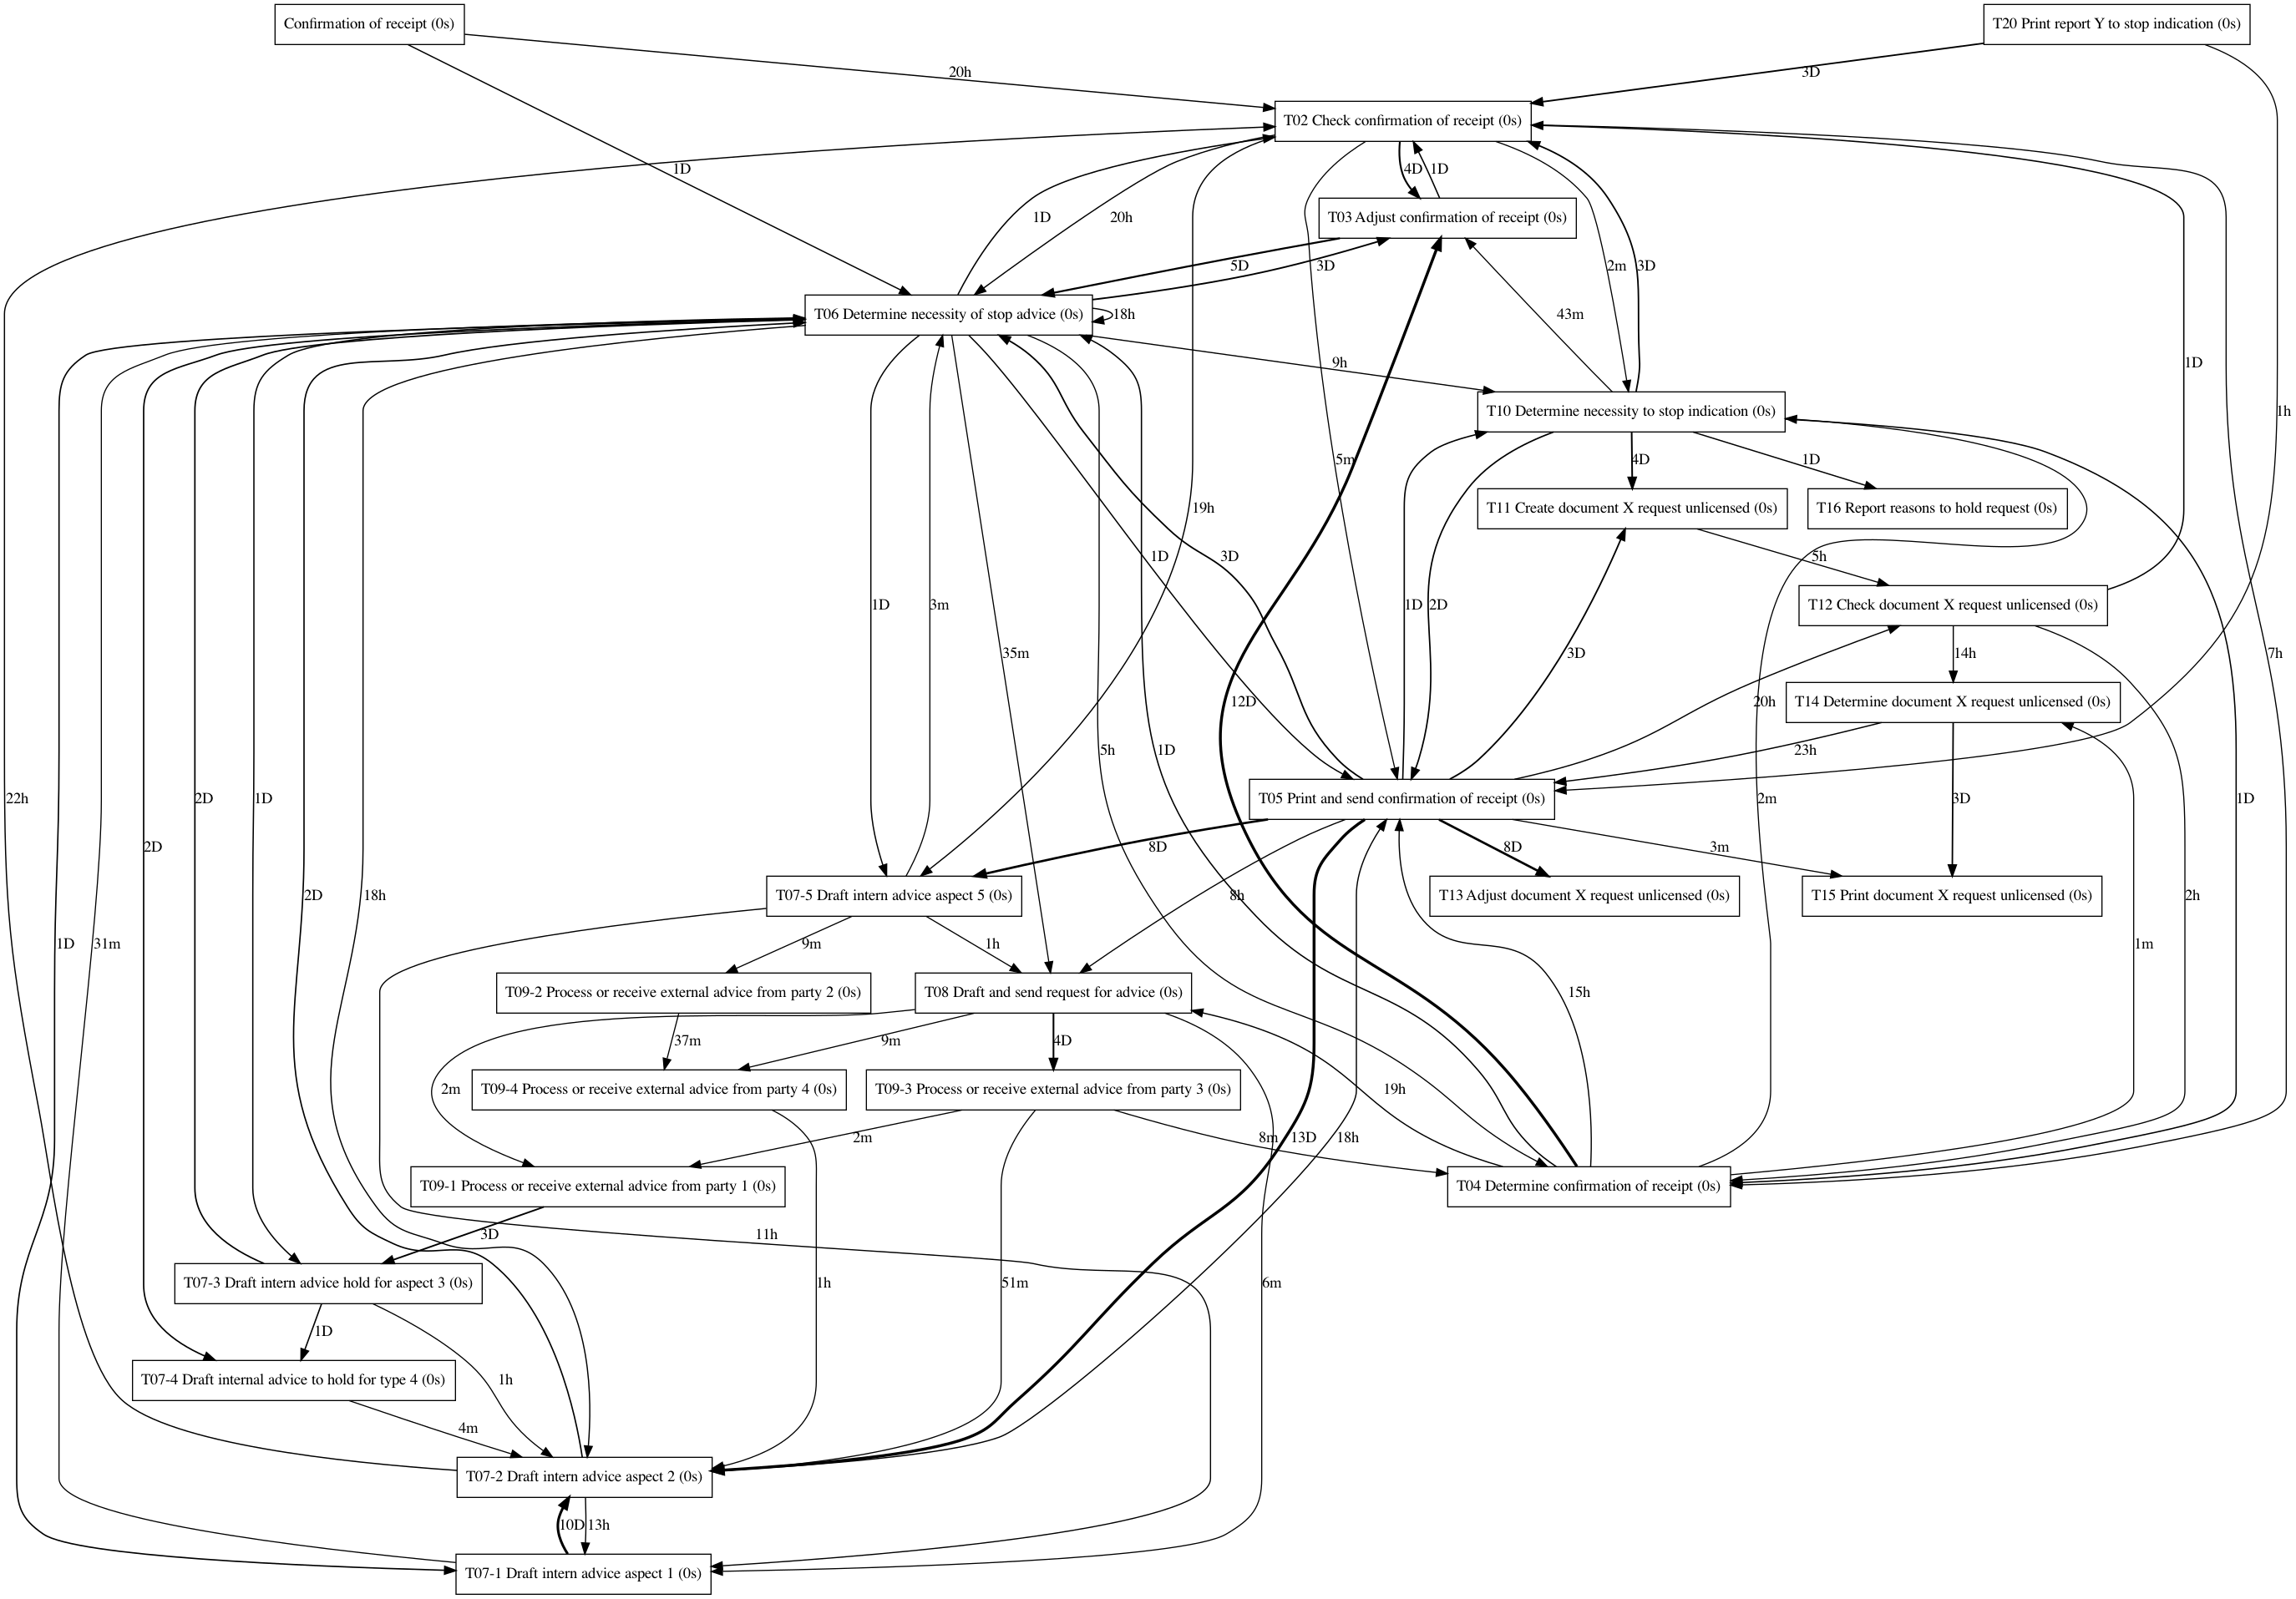

In [7]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

In [8]:
ds.graphviz(gviz.source, "Directly-Follows graph")

In [9]:
ds.publish()

Publishing story Process mining with pm4py to the examples space...
Published at: https://public.deetly.com/examples/a3422626300b122c6480ba8383b3085d 

